## Question 6

### Part A

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hpFilterTF4e(type, P, Q, param):
   
    # Initialize H as a P x Q matrix of zeros
    H = np.zeros((P, Q))

    # Define the center indices of the filter
    center_i, center_j = P // 2, Q // 2

    # Generate the filter based on the specified type and parameters
    if type == 'ideal':
        D0 = param
        for i in range(P):
            for j in range(Q):
                if np.sqrt((i - center_i)**2 + (j - center_j)**2) > D0:
                    H[i, j] = 1

    elif type == 'gaussian':
        D0 = param
        for i in range(P):
            for j in range(Q):
                H[i, j] = 1 - np.exp(-((i - center_i)**2 + (j - center_j)**2) / (2*D0**2))

    elif type == 'butterworth':
        D0, n = param
        for i in range(P):
            for j in range(Q):
                D = np.sqrt((i - center_i)**2 + (j - center_j)**2)
                if D != 0:
                    H[i, j] = 1 / (1 + (D0 / D)**(2*n))

    return H


### Part B

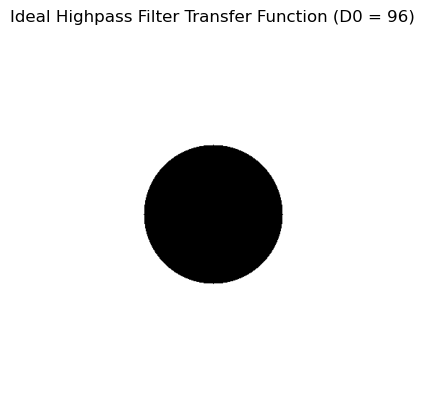

In [2]:
# Generate the ideal highpass filter transfer function
D0 = 96
H = hpFilterTF4e('ideal', 512, 512, D0)

# Display the result as an image
plt.imshow(H, cmap='gray')
plt.title('Ideal Highpass Filter Transfer Function (D0 = 96)')
plt.axis('off')
plt.show()
##The resulting image should show a circular region in the center that is



### Part C

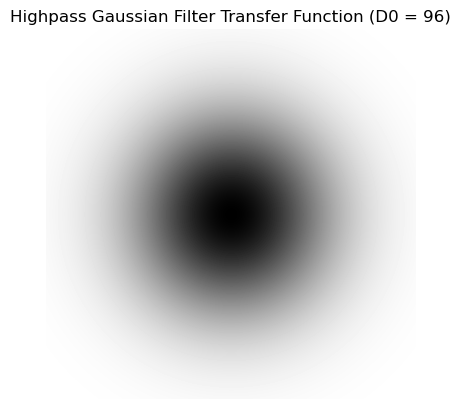

In [3]:
# Generate the highpass Gaussian filter transfer function
D0 = 96
H = hpFilterTF4e('gaussian', 512, 512, D0)

# Display the result as an image
plt.imshow(H, cmap='gray')
plt.title('Highpass Gaussian Filter Transfer Function (D0 = 96)')
plt.axis('off')
plt.show()

### Part D

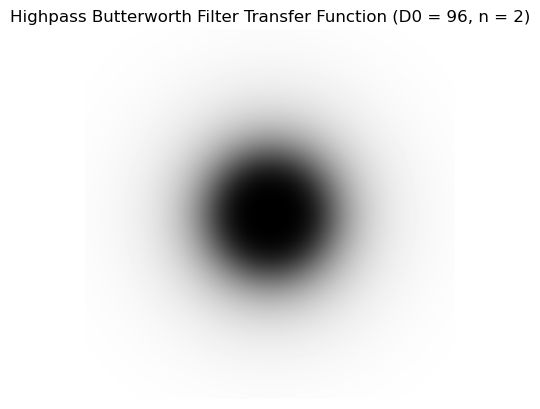

In [4]:
# Generate the highpass Butterworth filter transfer function
D0 = 96
n = 2
H = hpFilterTF4e('butterworth', 512, 512, [D0, n])

# Display the result as an image
plt.imshow(H, cmap='gray')
plt.title('Highpass Butterworth Filter Transfer Function (D0 = 96, n = 2)')
plt.axis('off')
plt.show()

## Question 7

### Part A

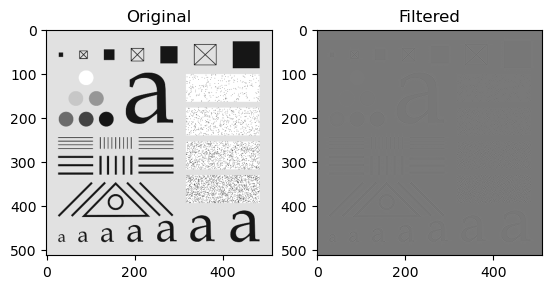

In [5]:
import numpy as np
from scipy import fftpack, ndimage
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('testpattern512.tif')

# Compute the Fourier transform of the image
img_fft = fftpack.fft2(img)

# Create a Gaussian lowpass filter
r, c = img.shape
r, c = np.mgrid[:r, :c]
center_r, center_c = r - r.mean(), c - c.mean()
sigma = 112
gaussian = np.exp(-(center_r**2 + center_c**2)/(2.0*sigma**2))

# Apply the lowpass filter to the Fourier transform of the image
img_fft_filtered = img_fft * gaussian

# Compute the inverse Fourier transform to obtain the filtered image
img_filtered = np.real(fftpack.ifft2(img_fft_filtered))

# Display the original and filtered images
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(img_filtered, cmap='gray')
axes[1].set_title('Filtered')
plt.show()


### Part B

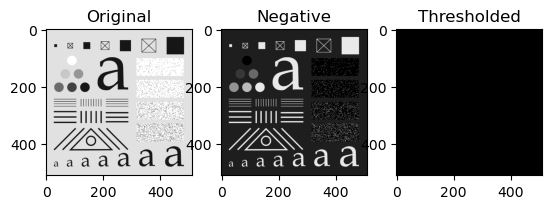

In [6]:
import numpy as np
from scipy import fftpack, ndimage
import matplotlib.pyplot as plt

# Load the image and take the negative of it
img = plt.imread('testpattern512.tif')
img_neg = 1.0 - img

# Compute the Fourier transform of the negative image
img_fft = fftpack.fftn(img_neg, axes=(0,1))

# Define the shape of the Butterworth filter to be the same as the shape of the Fourier transform of the image
r, c = img.shape[:2]

# Create a Butterworth lowpass filter with a cutoff frequency and order of your choice
cutoff_freq = 0.00001
order = 4
r, c = np.mgrid[:r, :c]
center_r, center_c = r - r.mean(), c - c.mean()
dist = np.sqrt(center_r**2 + center_c**2)
butterworth = 1.0 / (1.0 + (dist / cutoff_freq)**(2*order))

# Apply the filter to the Fourier transform of the negative image
img_fft_filtered = img_fft * butterworth

# Compute the inverse Fourier transform of the filtered image
img_filtered = np.real(fftpack.ifftn(img_fft_filtered, axes=(0,1)))

# Take the negative of the resulting image
img_filtered_neg = 1.0 - img_filtered

# Threshold the image to show only the desired part of the large square
thresh_value =0.99
img_thresh = np.zeros_like(img_filtered_neg)
img_thresh[img_filtered_neg > thresh_value] = 1.0

# Display the original and filtered images
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(img_neg, cmap='gray')
axes[1].set_title('Negative')
axes[2].imshow(img_thresh, cmap='gray')
axes[2].set_title('Thresholded')
plt.show()


## Question 8

/var/folders/xd/7xbbxhs53f36m2cf0d1gf7jm0000gp/T/ipykernel_20031/1870780819.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('zoneplate.png', as_gray=True) / 255.0


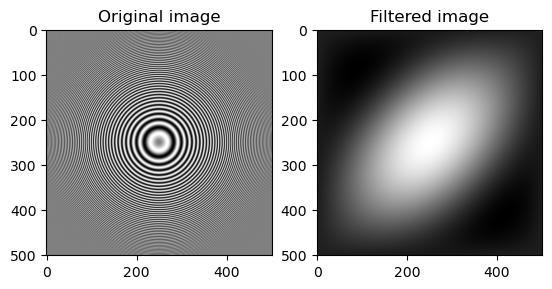

In [7]:
import numpy as np
from scipy import fftpack, ndimage
import imageio

# Step 1: Read the image and scale its intensity range to [0,1]
img = imageio.imread('zoneplate.png', as_gray=True) / 255.0

# Step 2: Perform a 2D Fourier transform of the image
F = fftpack.fft2(img)

# Step 3: Shift the zero frequency component to the center of the Fourier spectrum
F = fftpack.fftshift(F)

# Step 4: Create a Butterworth filter transfer function with sharp cutoffs
n = 3  # order of Butterworth filter
D0 = 0.05  # cutoff frequency
ny, nx = img.shape
u, v = np.meshgrid(np.arange(nx) - nx/2, np.arange(ny) - ny/2, indexing='ij')
D = np.sqrt(u**2 + v**2) / D0
H = 1.0 / (1.0 + (D**2)**n)

# Step 5: Apply the filter to the Fourier spectrum
G = H * F

# Step 6: Shift the zero frequency component back to the top-left corner of the Fourier spectrum
G = fftpack.ifftshift(G)

# Step 7: Inverse transform the filtered Fourier spectrum to obtain the filtered image
filteredImg = np.real(fftpack.ifft2(G))

# Display the original and filtered images side by side
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(filteredImg, cmap='gray')
axs[1].set_title('Filtered image')
plt.show()
